In [3]:
'''
  author : @hunarbatra
'''

import numpy as np                            
import pandas as pd                             
import matplotlib.pyplot as plt                
import seaborn as sns                          

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Global Mobility Data
# This is the Google Global Mobility Data
# Link for this dataset = https://drive.google.com/file/d/1cJJ0KIOhAnZxORVmVYZM2evOLgQMnHaH/view?usp=sharing
link = '/content/drive/My Drive/Global_Mobility_Report (6).csv'
df = pd.read_csv(link, header=0, usecols = lambda column : column not in ["country_region_code", "sub_region_1" , "sub_region_2"], engine = 'python', parse_dates = True)

In [6]:
df.head()
#df.tail()

country_region  ... residential_percent_change_from_baseline
0  United Arab Emirates  ...                                      1.0
1  United Arab Emirates  ...                                      1.0
2  United Arab Emirates  ...                                      1.0
3  United Arab Emirates  ...                                      1.0
4  United Arab Emirates  ...                                      1.0

[5 rows x 8 columns]

In [7]:
# Number of countries in Google Mobility Data
unique_value = df["country_region"].nunique() 
print(unique_value)
# List of countries
list_of_countries = df["country_region"].unique()
print(list_of_countries)

list_of_countries = ['Australia', 'Brazil', 'Denmark', 'France', 'India', 'Japan', 'South Africa', 'South Korea', 'Sweden', 'United Kingdom', 'United States']

132
['United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Aruba' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Benin' 'Bolivia' 'Brazil' 'The Bahamas' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Switzerland' "Côte d'Ivoire" 'Chile' 'Cameroon' 'Colombia'
 'Costa Rica' 'Cape Verde' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 'Guinea-Bissau' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'Ireland' 'Israel' 'India' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Japan' 'Kenya' 'Kyrgyzstan' 'Cambodia' 'South Korea' 'Kuwait'
 'Kazakhstan' 'Laos' 'Lebanon' 'Liechtenstein' 'Sri Lanka' 'Lithuania'
 'Luxembourg' 'Latvia' 'Libya' 'Moldova' 'North Macedonia' 'Mali'
 'Myanmar (Burma)' 'Mongolia' 'Malta' 'Mauritius' 'Mexico' 'Malaysia'
 'Mozambique' 'Namibia' 'Ni

In [0]:
# Oxford Policy Dataset 
# Link = https://drive.google.com/open?id=1SnLZlBAbmAHWL8qhXpEhJG4P4a3Pl3vE
link = '/content/drive/My Drive/task9oxford-new-14may.csv' # Data upto 14/05
policy_data = pd.read_csv(link, header=0, index_col=['Date'], engine = 'python', parse_dates = True)

In [9]:
# List of Countries in Oxford Dataset
list_of_countries_oxford = policy_data["CountryName"].unique()
print(list_of_countries_oxford)

['Aruba' 'Afghanistan' 'Angola' 'United Arab Emirates' 'Argentina'
 'Australia' 'Austria' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bosnia and Herzegovina' 'Belize' 'Bolivia' 'Brazil'
 'Barbados' 'Botswana' 'Canada' 'Switzerland' 'Chile' 'Cameroon'
 'Colombia' 'Cape Verde' 'Costa Rica' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Spain' 'Estonia' 'Finland'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 'Hong Kong' 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland'
 'Iraq' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kazakhstan' 'Kenya'
 'South Korea' 'Kuwait' 'Laos' 'Lebanon' 'Libya' 'Sri Lanka' 'Luxembourg'
 'Moldova' 'Mexico' 'Mali' 'Mongolia' 'Mozambique' 'Mauritius' 'Malaysia'
 'Namibia' 'Niger' 'Nigeria' 'Nicaragua' 'Netherlands' 'Norway'
 'New Zealand' 'Oman' 'Pakistan' 'Panama' 'Peru' 'Philippines'
 'Papua New Guinea' 'Poland' 'Puerto Rico' 'Portugal' 'Paraguay' 'Qatar'
 'Romania' 'Rwanda' 'Saudi Ar

In [10]:
# List of Common countries in Oxford and Mobility Dataset
def intersection(list1, list2): 
    countries_list = [value for value in list1 if value in list2] 
    return countries_list

plot_countries = intersection(list_of_countries, list_of_countries_oxford).copy()
print(plot_countries)
print(len(plot_countries))

['Australia', 'Brazil', 'Denmark', 'France', 'India', 'Japan', 'South Africa', 'South Korea', 'Sweden', 'United Kingdom', 'United States']
11


In [11]:
# List of Dates for Plotting - x-axis
xdates = df.date.unique()
xdates = xdates.tolist()
print(len(xdates))

89


In [0]:
def plot_country(country_name) :
  country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 17/04
  #if(country_name == 'Israel'): # In the Global Mobility Dataset, the data for Israel is only available upto 11th April'20. For the rest it is upto 17th April'20
  #  dates = xdates[:len(xdates)-6] # Removing the last 6 dates -- 12...17th April'20 from the x-axis
  #  country_mobility_data = country_mobility_data.head(57) # 15th Feb .... 11th April
  #else:
  dates = xdates # Else, x axis dates remain the same
  country_mobility_data = country_mobility_data.head(89) # 15th Feb .... 13th May
    
  country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
  country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data
  country_policies = country_policies.head(89)

  fig, ax = plt.subplots(figsize=(28,12))
  ax.plot_date(dates, country_mobility_data.retail_and_recreation_percent_change_from_baseline, linestyle='--', label='Retail and Recreation')
  ax.plot_date(dates, country_mobility_data.grocery_and_pharmacy_percent_change_from_baseline, linestyle='--', label = 'Grocery and Pharmacy')
  ax.plot_date(dates, country_mobility_data.parks_percent_change_from_baseline, linestyle='--', label = 'Parks')
  ax.plot_date(dates, country_mobility_data.transit_stations_percent_change_from_baseline, linestyle='--', label = 'Transit Stations')
  ax.plot_date(dates, country_mobility_data.workplaces_percent_change_from_baseline, linestyle='--', label = 'Workplaces')
  ax.plot_date(dates, country_mobility_data.residential_percent_change_from_baseline, linestyle='--', label = 'Residential')

  school = country_policies['C1_School closing'].tolist()
  for x in range(len(school)):
    if school[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("School Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(50, 150), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  workplace = country_policies['C2_Workplace closing'].tolist() 
  for x in range(len(workplace)):
    if workplace[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Workplace Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(-20, 80), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  public_events = country_policies['C3_Cancel public events'].tolist()
  for x in range(len(public_events)):
    if public_events[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Public Events Cancellation", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(100, 120), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  transport = country_policies['C4_Restrictions on gatherings'].tolist()
  for x in range(len(transport)):
    if transport[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Garhering Restrictions", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(120, 120), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  public_trans = country_policies['C5_Close public transport'].tolist()
  for x in range(len(public_trans)):
    if public_trans[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Public Transport Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(40, 80), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  movement = country_policies['C7_Restrictions on internal movement'].tolist()
  for x in range(len(movement)):
    if movement[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Internal Movement Restriction", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 160), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  travel = country_policies['C8_International travel controls'].tolist()
  for x in range(len(travel)):
    if travel[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("International Travel Controls", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(70, -150), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  sah = country_policies['C6_Stay at home requirements'].tolist()
  for x in range(len(sah)):
    if sah[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Stay at Home Requirement", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(-40, 150), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  plt.title(country_name, fontsize=25)
  plt.grid(True)
  plt.xlabel("Dates", fontsize=20)
  plt.ylabel("% Change in Mobility", fontsize=20)
  plt.legend(loc="best")
  plt.axis('tight')
  plt.style.context('seaborn-white')
  plt.xticks(rotation=45)
  plt.show()

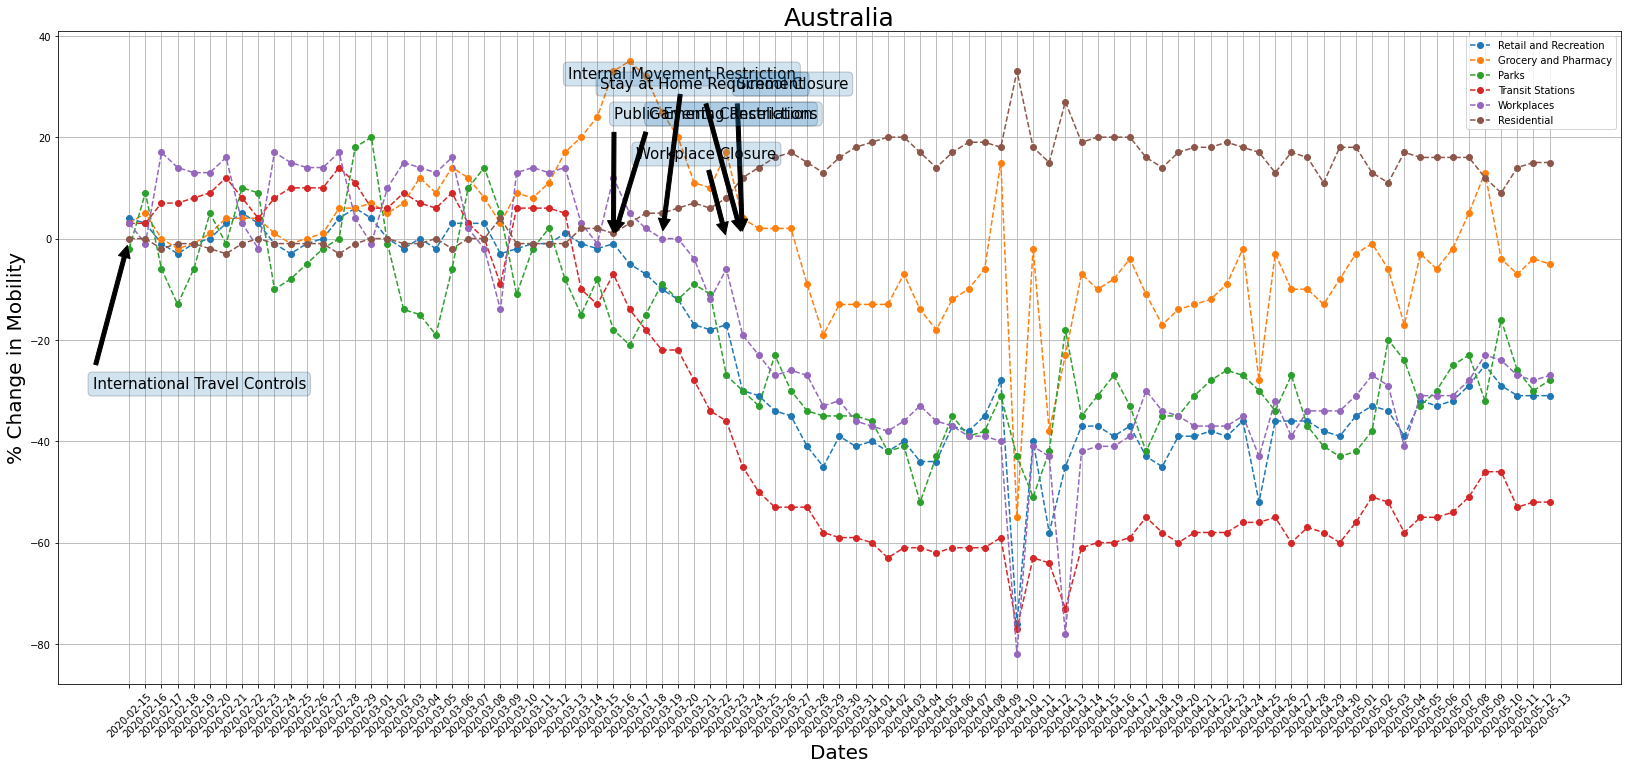

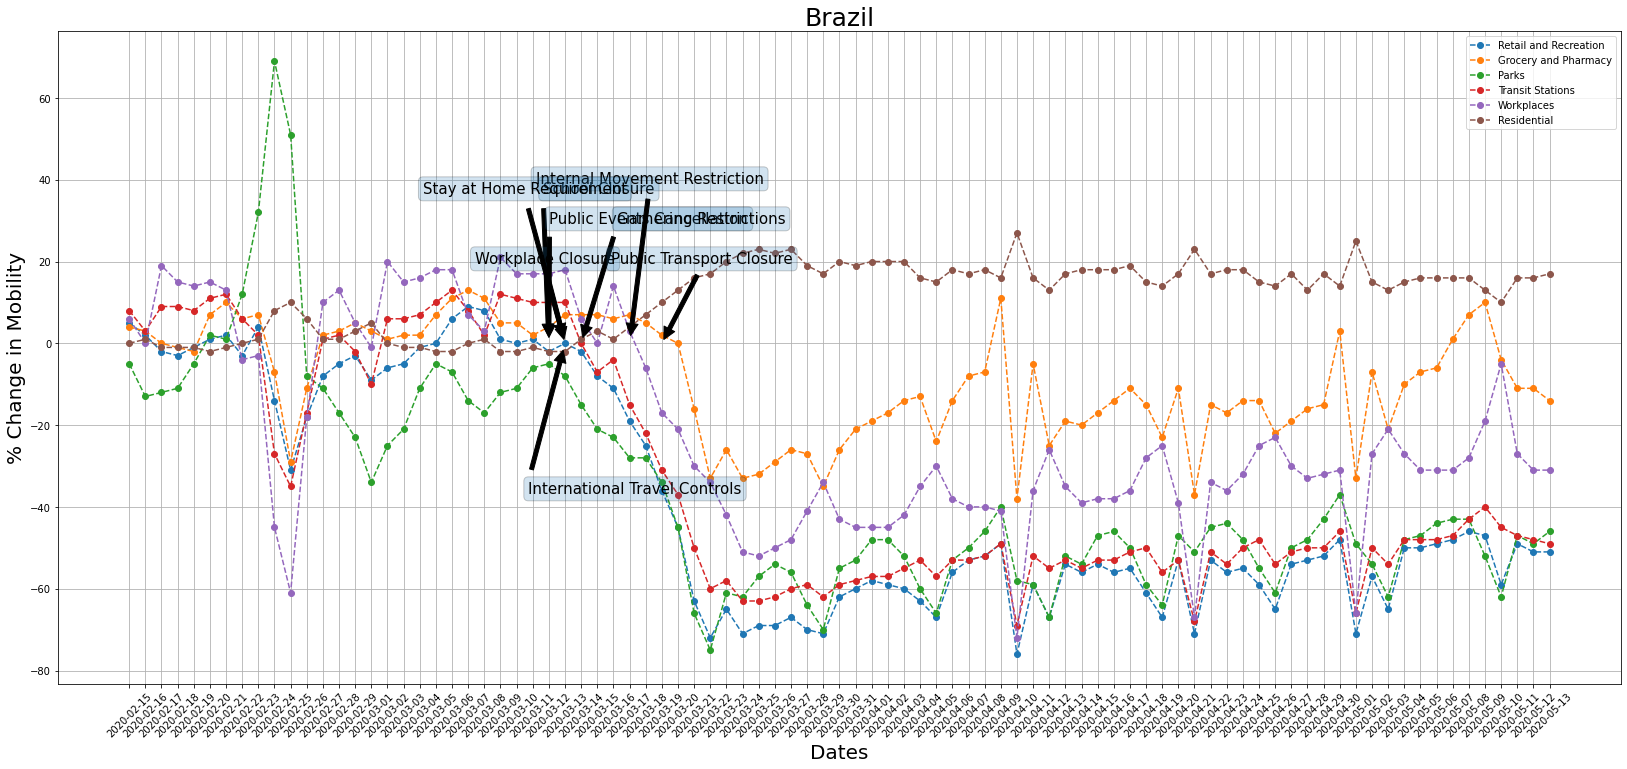

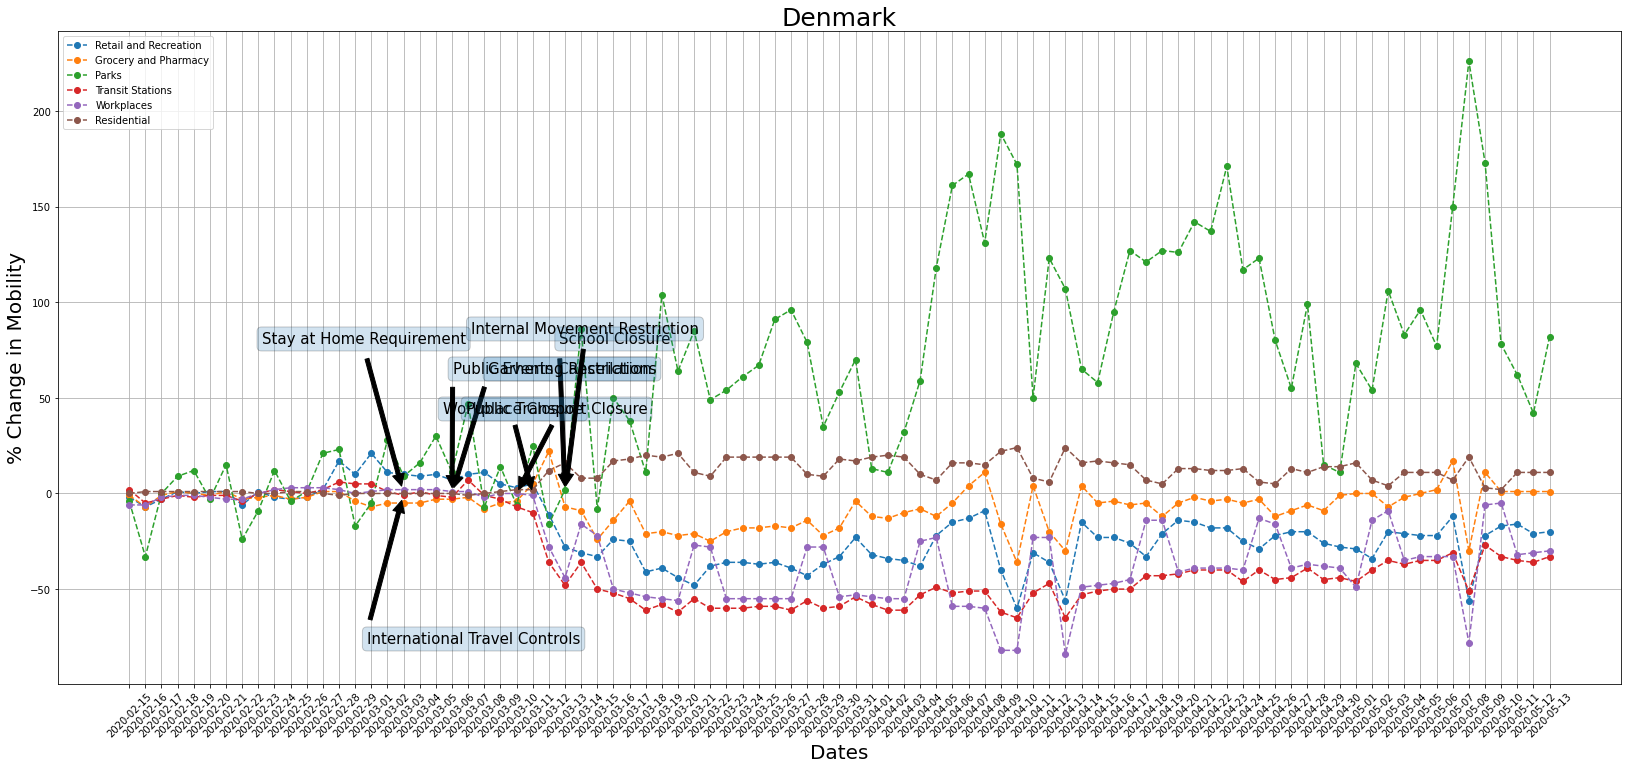

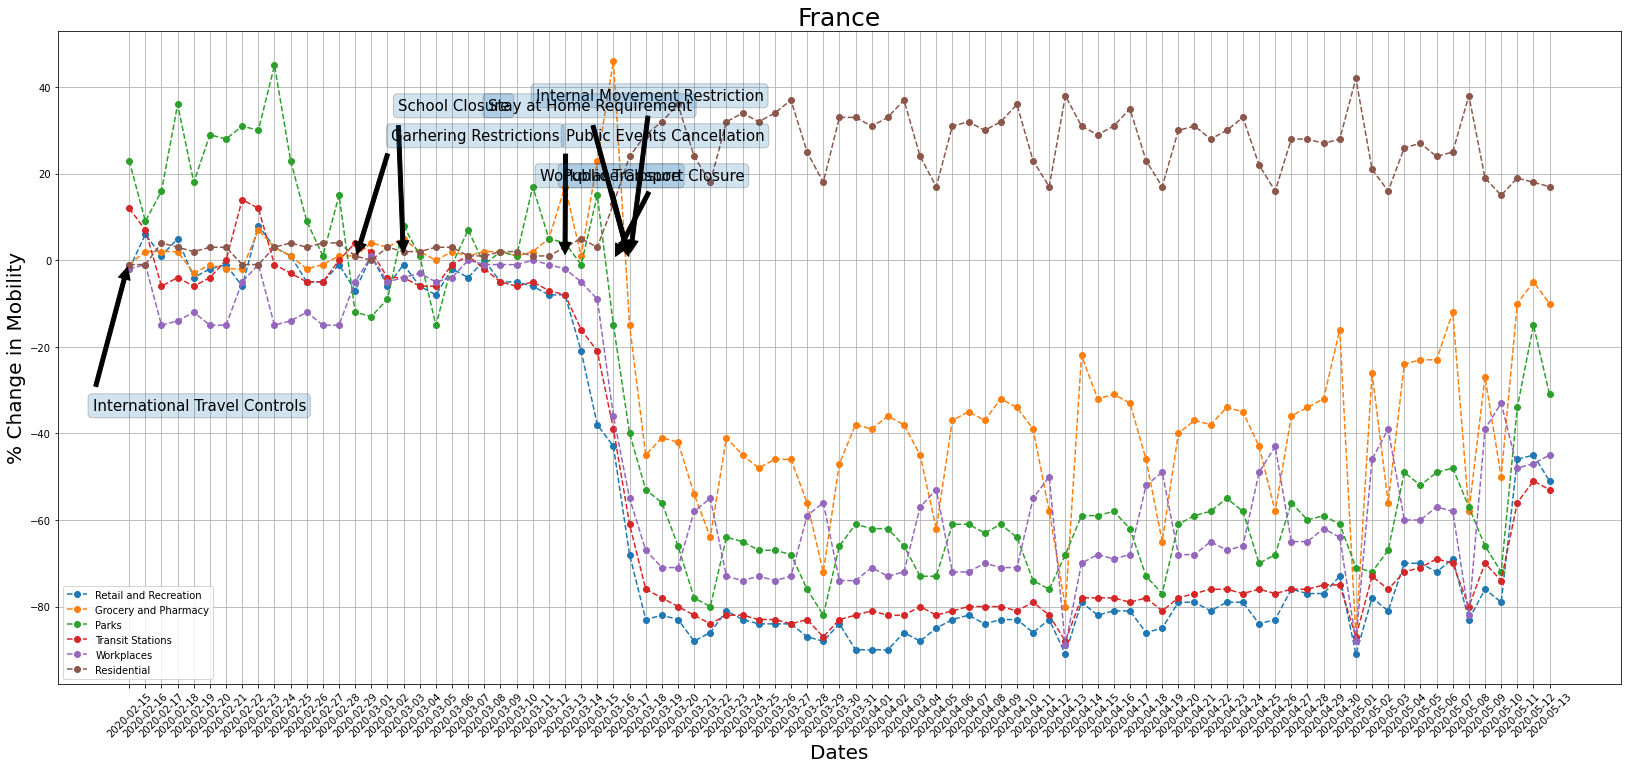

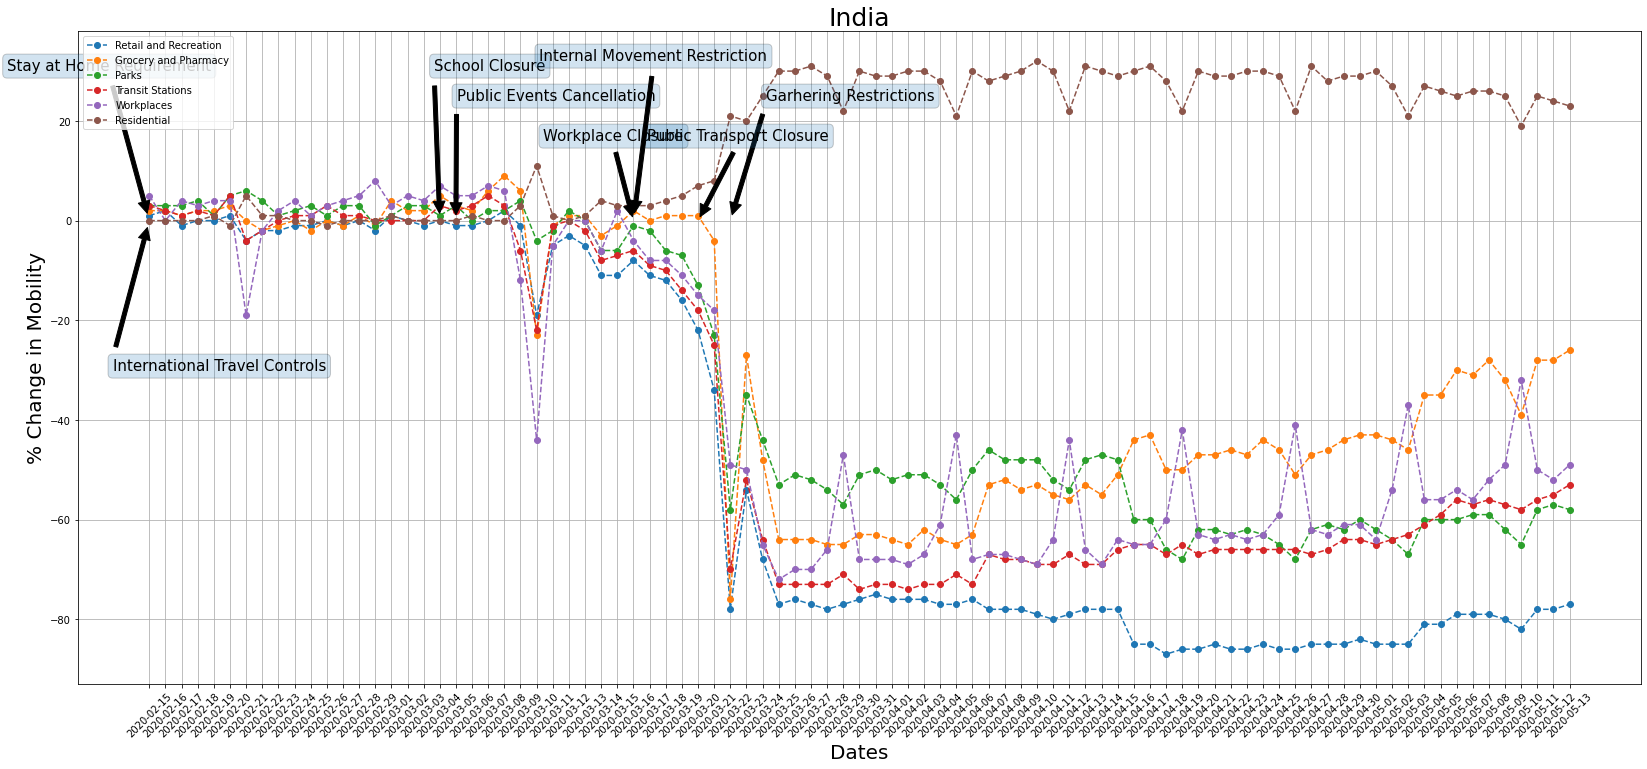

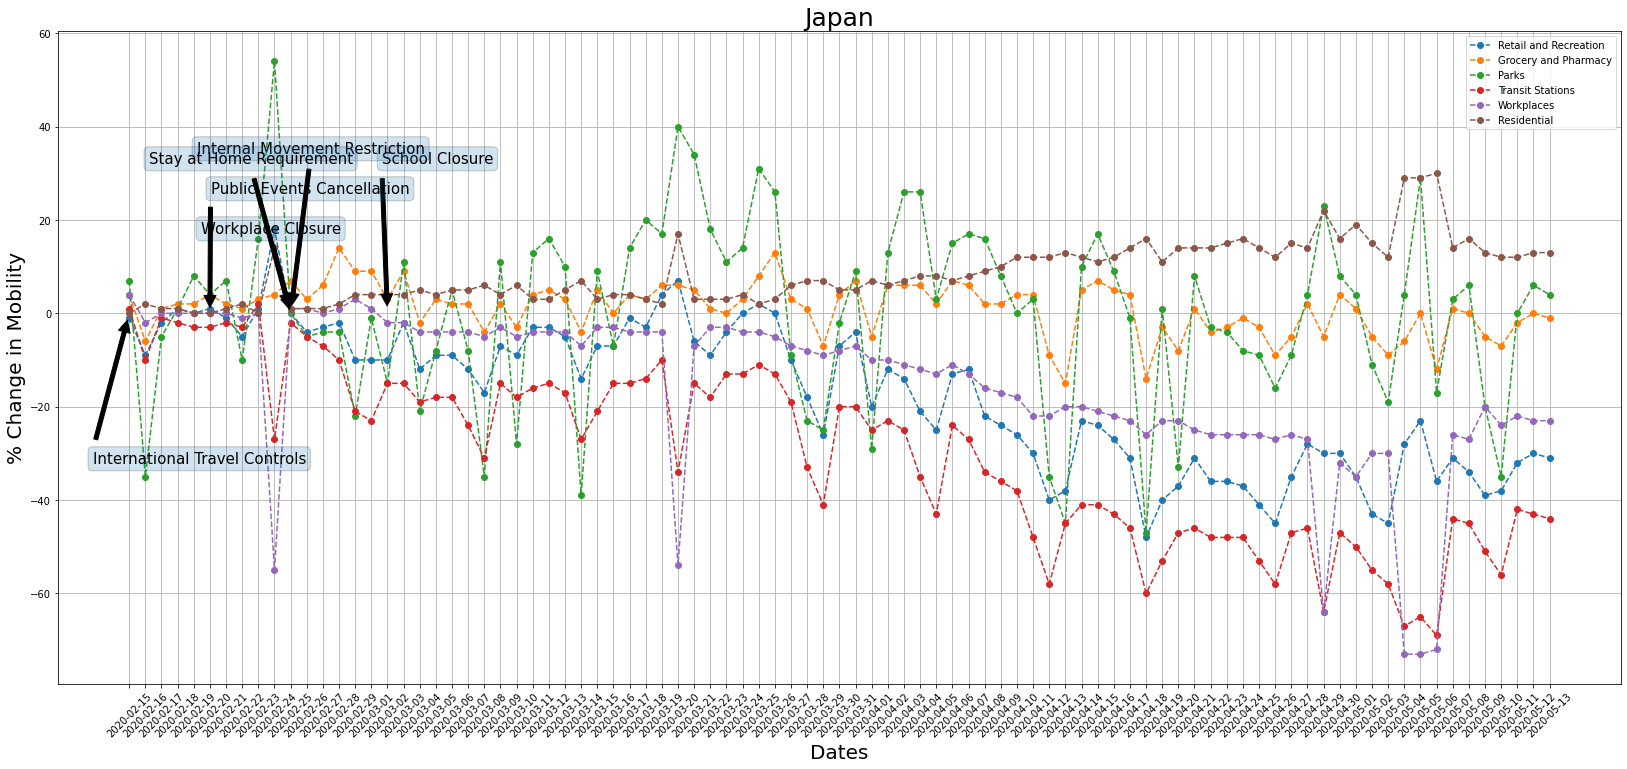

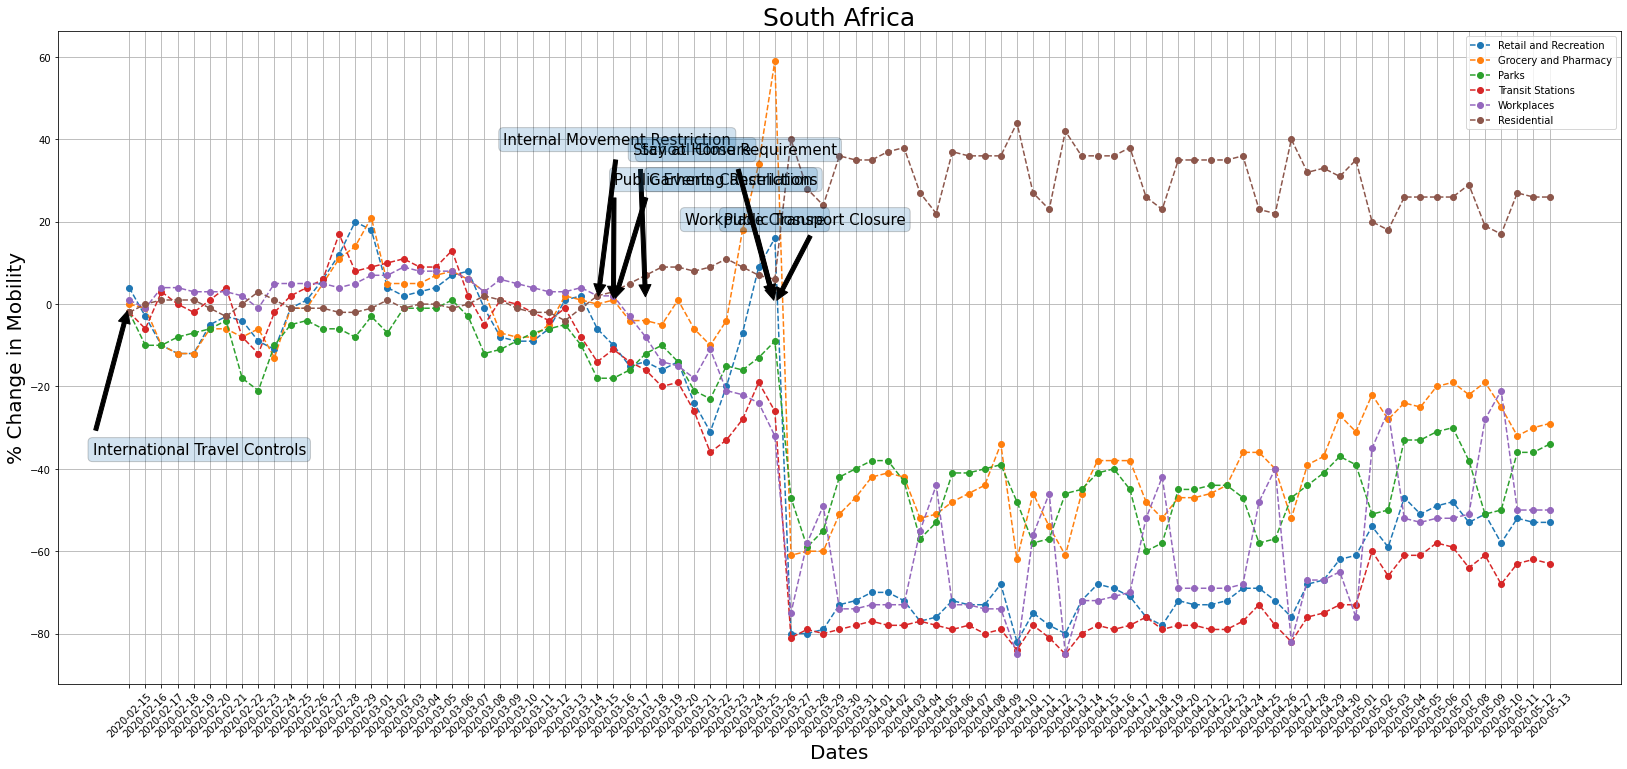

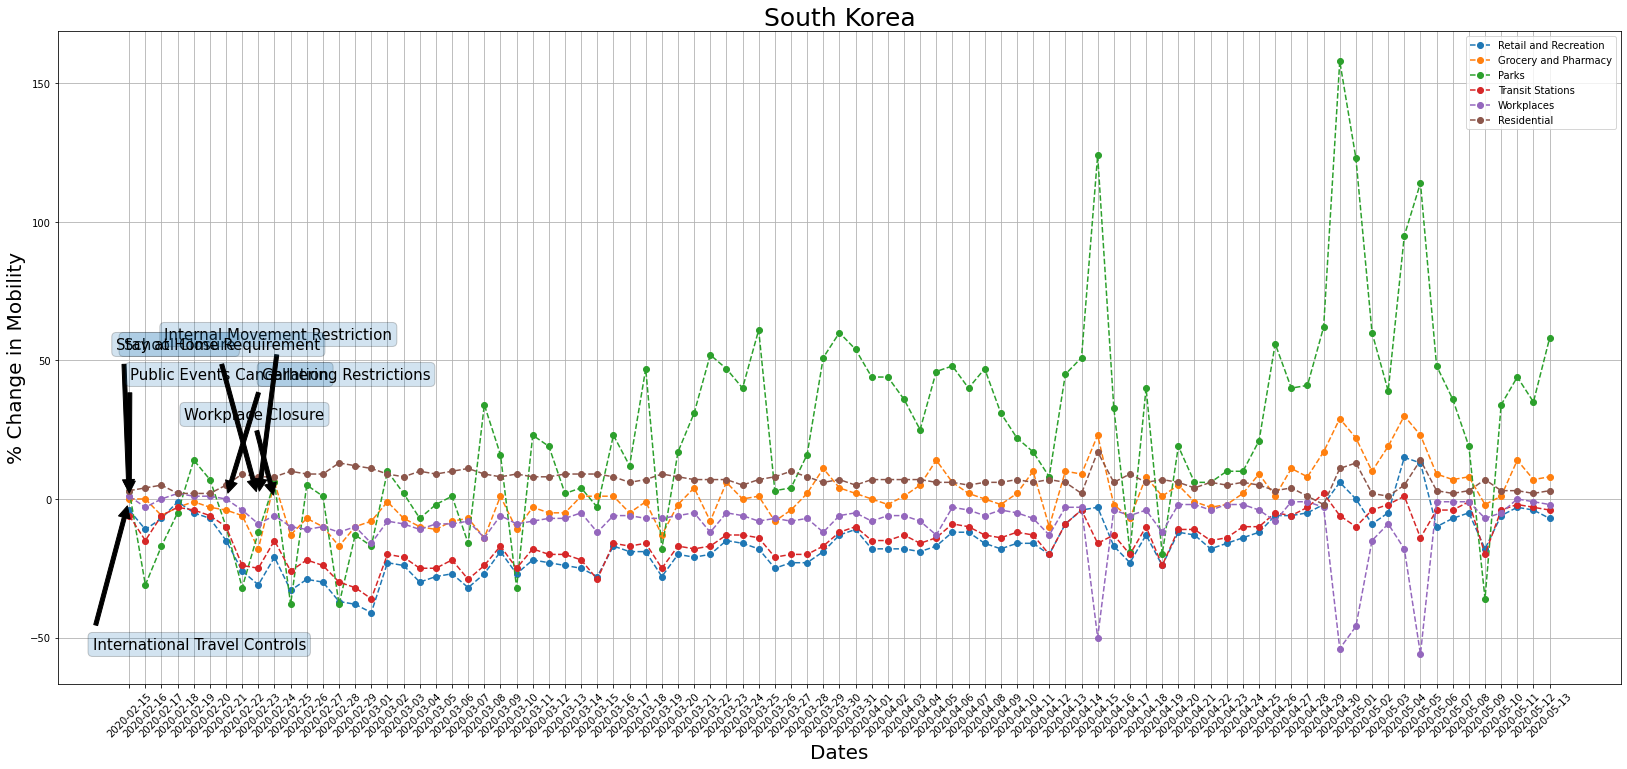

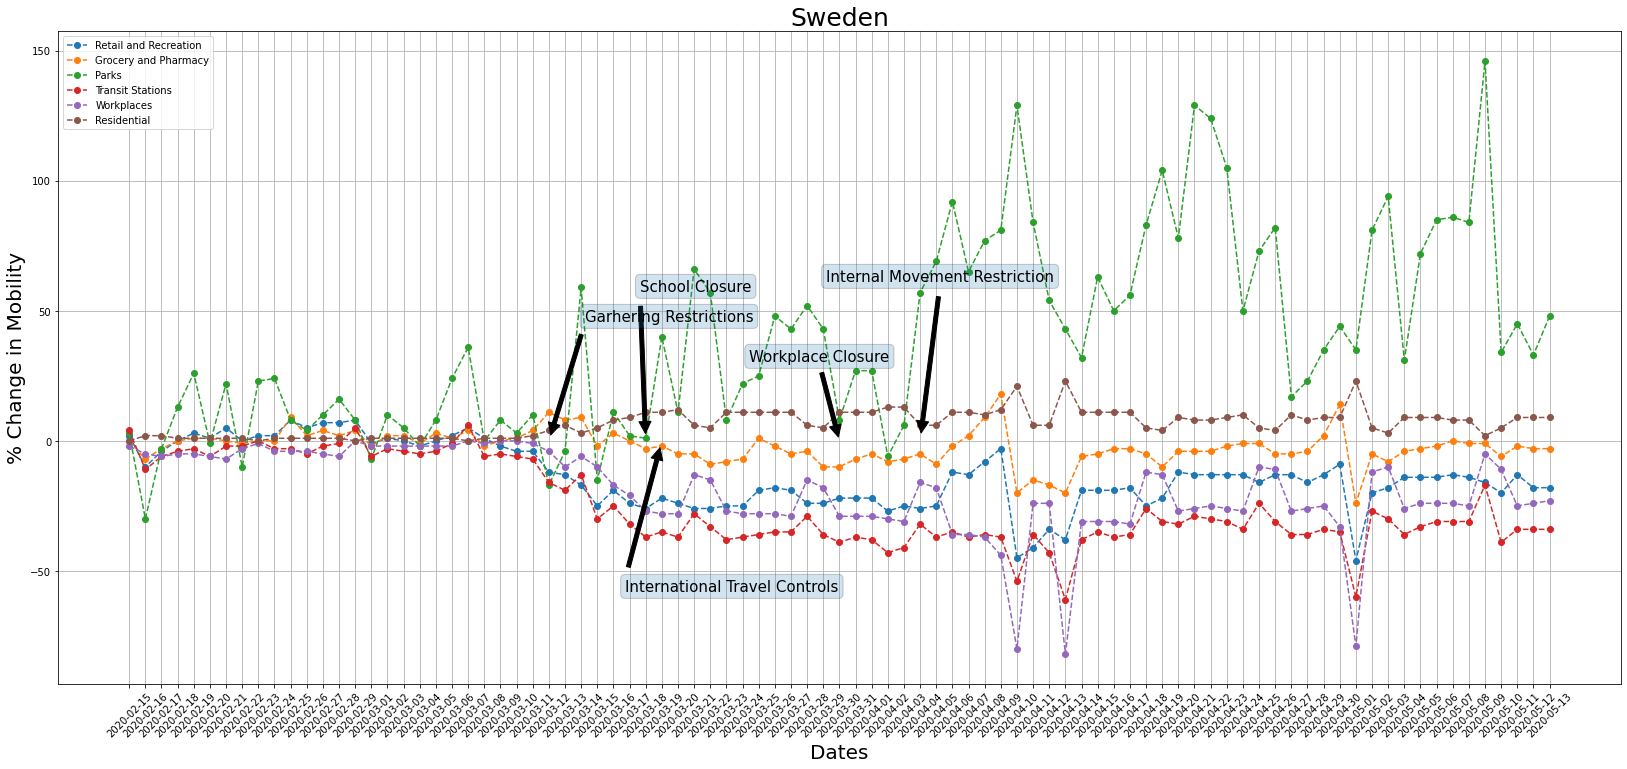

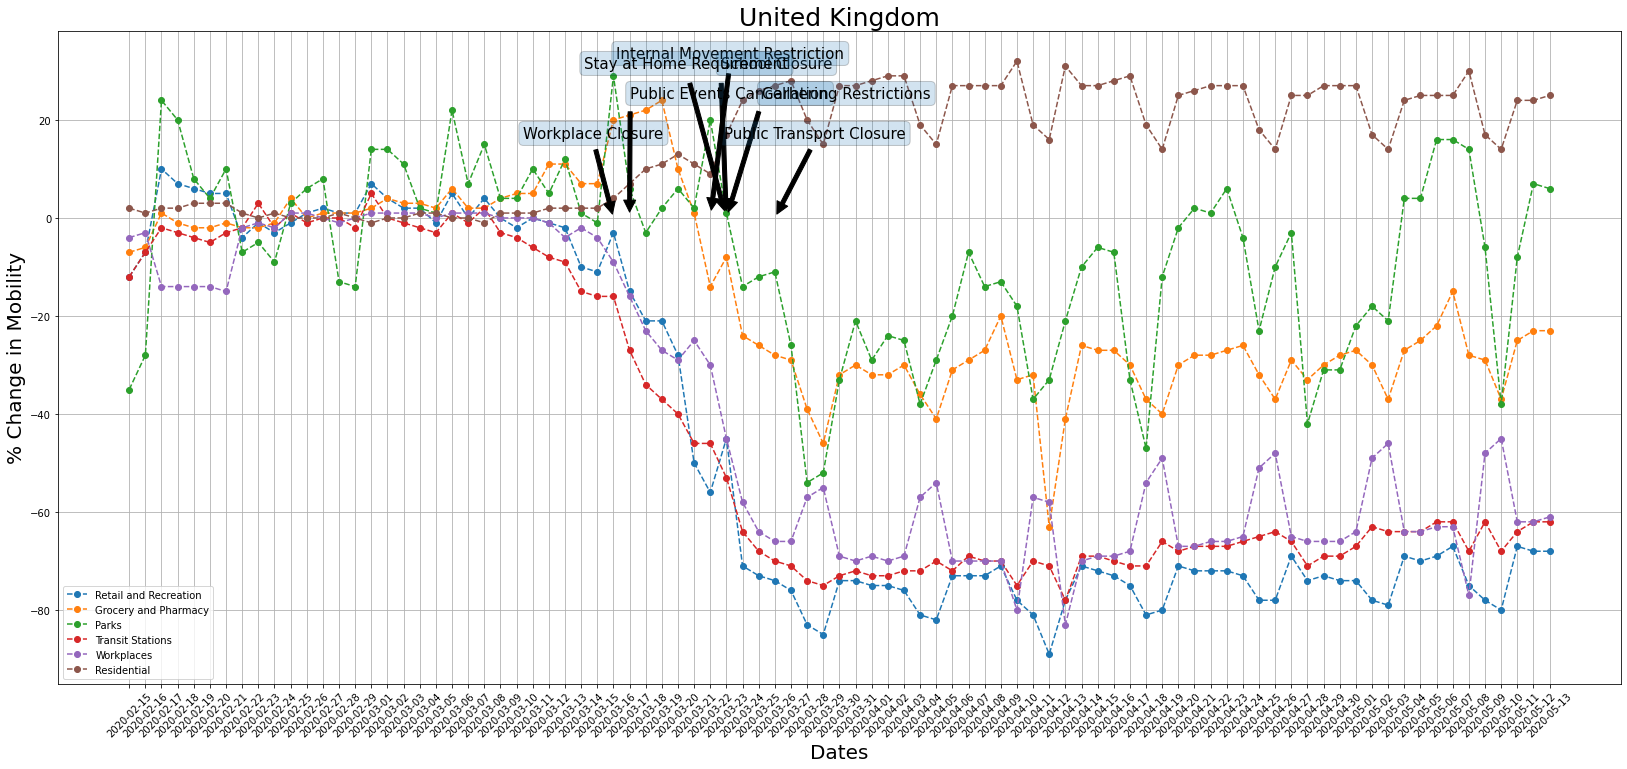

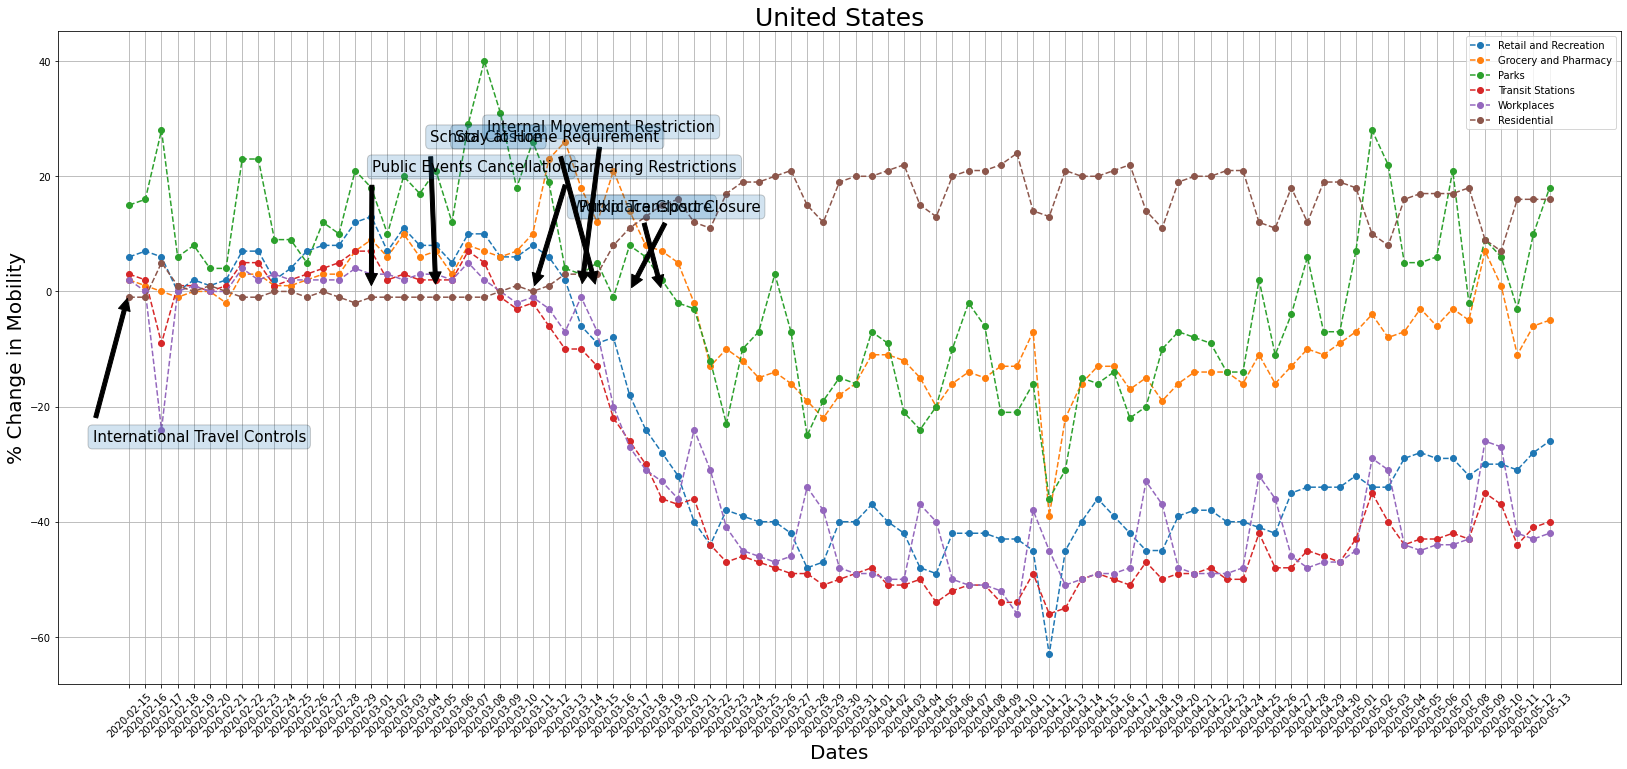

In [13]:
# plot_country('Bangladesh')
# Plot the graph for every country in plot_countries i.e for 106 countries
for country in list_of_countries:
  plot_country(country) 

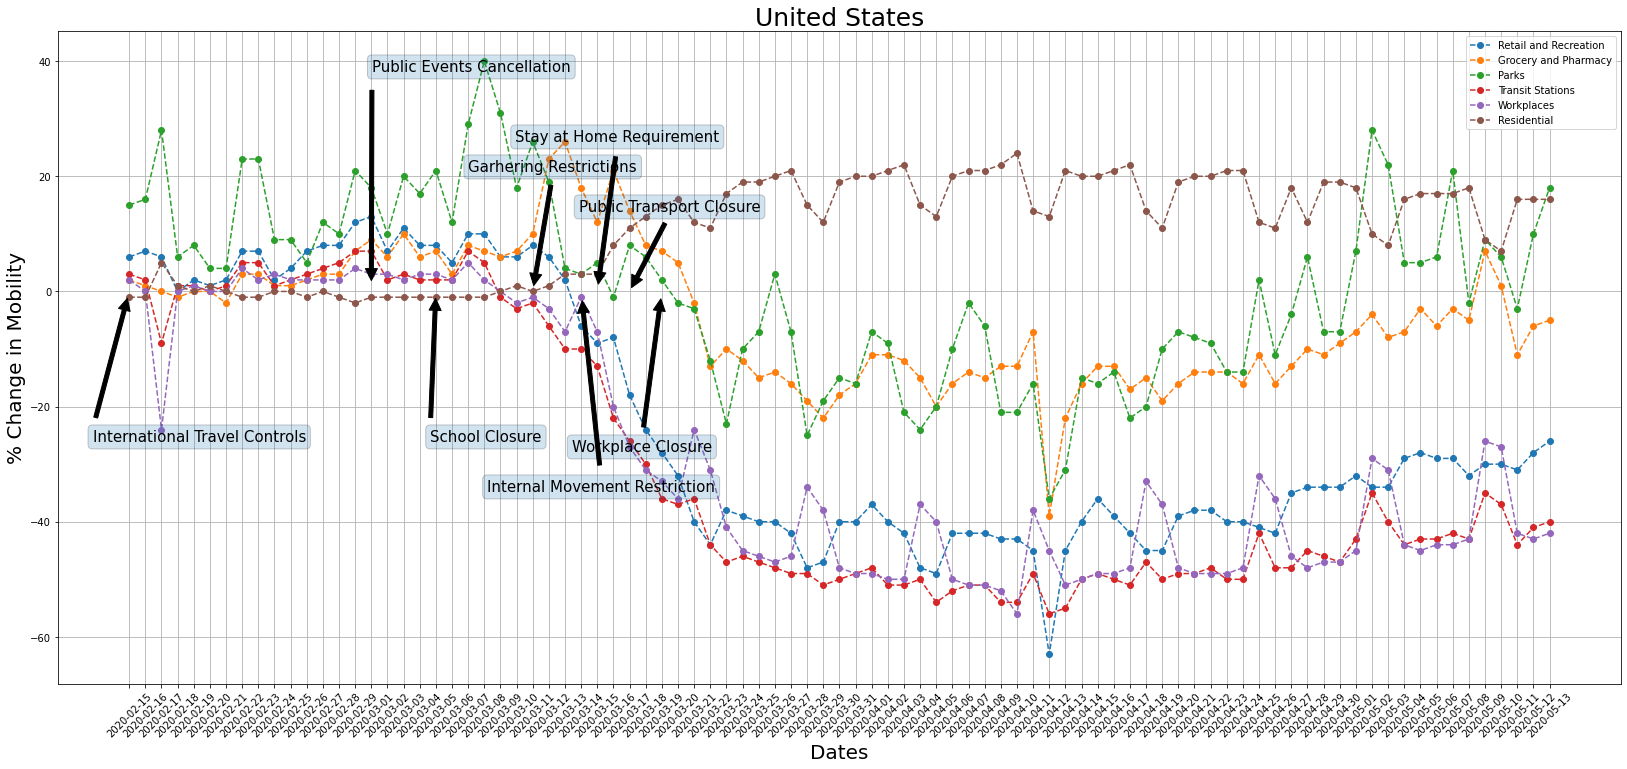

In [14]:
country_name = 'United States'
country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 17/04
#if(country_name == 'Israel'): # In the Global Mobility Dataset, the data for Israel is only available upto 11th April'20. For the rest it is upto 17th April'20
#  dates = xdates[:len(xdates)-6] # Removing the last 6 dates -- 12...17th April'20 from the x-axis
#  country_mobility_data = country_mobility_data.head(57) # 15th Feb .... 11th April
#else:
dates = xdates # Else, x axis dates remain the same
country_mobility_data = country_mobility_data.head(89) # 15th Feb .... 13th May
  
country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data
country_policies = country_policies.head(89)

fig, ax = plt.subplots(figsize=(28,12))
ax.plot_date(dates, country_mobility_data.retail_and_recreation_percent_change_from_baseline, linestyle='--', label='Retail and Recreation')
ax.plot_date(dates, country_mobility_data.grocery_and_pharmacy_percent_change_from_baseline, linestyle='--', label = 'Grocery and Pharmacy')
ax.plot_date(dates, country_mobility_data.parks_percent_change_from_baseline, linestyle='--', label = 'Parks')
ax.plot_date(dates, country_mobility_data.transit_stations_percent_change_from_baseline, linestyle='--', label = 'Transit Stations')
ax.plot_date(dates, country_mobility_data.workplaces_percent_change_from_baseline, linestyle='--', label = 'Workplaces')
ax.plot_date(dates, country_mobility_data.residential_percent_change_from_baseline, linestyle='--', label = 'Residential')

school = country_policies['C1_School closing'].tolist()
for x in range(len(school)):
  if school[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("School Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(50, -150), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

workplace = country_policies['C2_Workplace closing'].tolist() 
for x in range(len(workplace)):
  if workplace[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Workplace Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(-20, -160), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

public_events = country_policies['C3_Cancel public events'].tolist()
for x in range(len(public_events)):
  if public_events[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Public Events Cancellation", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(100, 220), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

transport = country_policies['C4_Restrictions on gatherings'].tolist()
for x in range(len(transport)):
  if transport[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Garhering Restrictions", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 120), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

public_trans = country_policies['C5_Close public transport'].tolist()
for x in range(len(public_trans)):
  if public_trans[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Public Transport Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(40, 80), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

movement = country_policies['C7_Restrictions on internal movement'].tolist()
for x in range(len(movement)):
  if movement[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Internal Movement Restriction", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, -200), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

travel = country_policies['C8_International travel controls'].tolist()
for x in range(len(travel)):
  if travel[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("International Travel Controls", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(70, -150), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

sah = country_policies['C6_Stay at home requirements'].tolist()
for x in range(len(sah)):
  if sah[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Stay at Home Requirement", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 150), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

plt.title(country_name, fontsize=25)
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("% Change in Mobility", fontsize=20)
plt.legend(loc="best")
plt.axis('tight')
plt.style.context('seaborn-white')
plt.xticks(rotation=45)
plt.show()

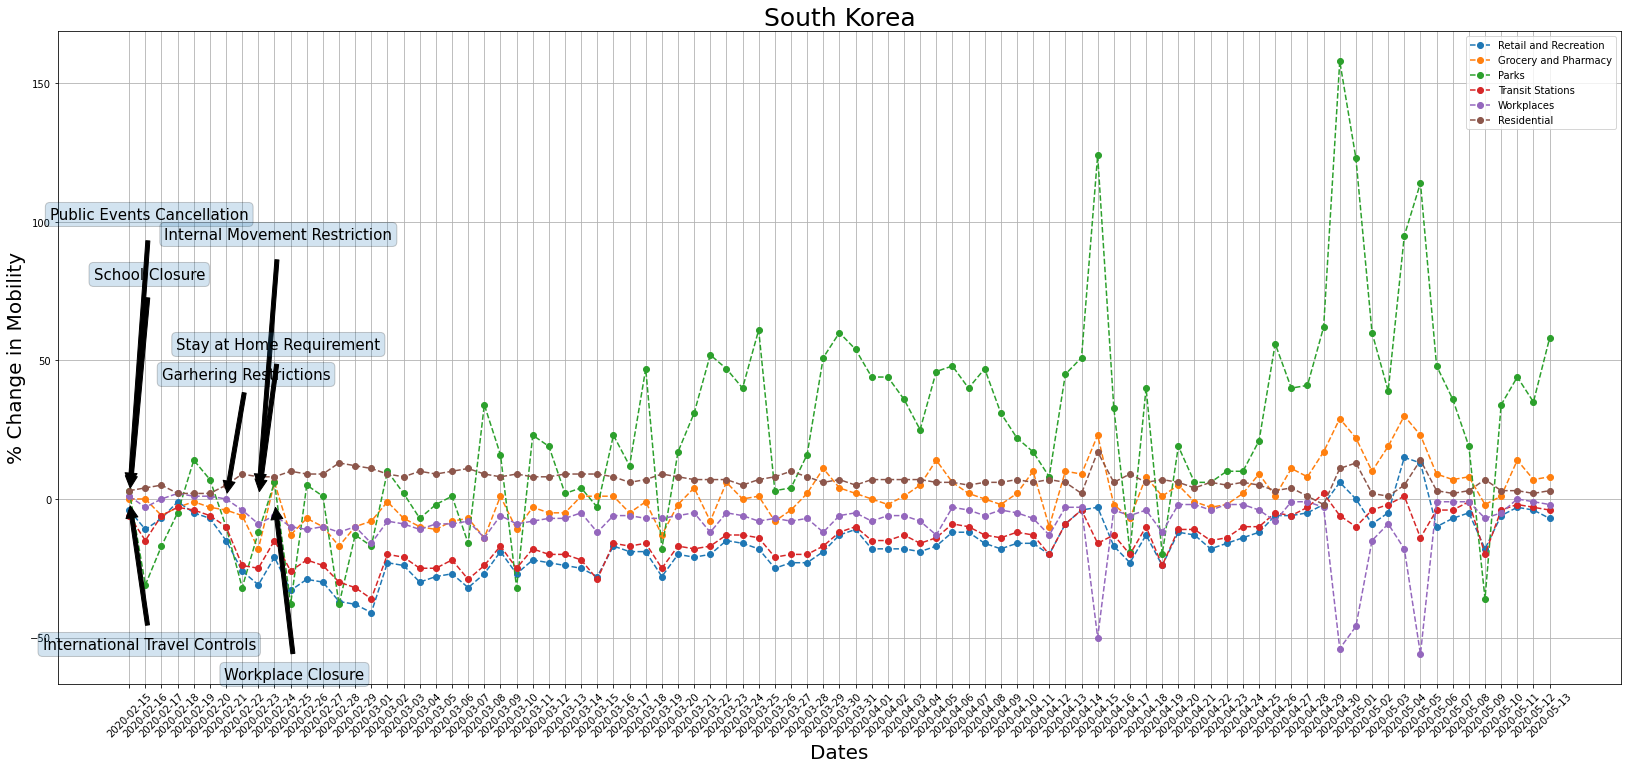

In [15]:
country_name = 'South Korea'
country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 17/04
#if(country_name == 'Israel'): # In the Global Mobility Dataset, the data for Israel is only available upto 11th April'20. For the rest it is upto 17th April'20
#  dates = xdates[:len(xdates)-6] # Removing the last 6 dates -- 12...17th April'20 from the x-axis
#  country_mobility_data = country_mobility_data.head(57) # 15th Feb .... 11th April
#else:
dates = xdates # Else, x axis dates remain the same
country_mobility_data = country_mobility_data.head(89) # 15th Feb .... 13th May
  
country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data
country_policies = country_policies.head(89)

fig, ax = plt.subplots(figsize=(28,12))
ax.plot_date(dates, country_mobility_data.retail_and_recreation_percent_change_from_baseline, linestyle='--', label='Retail and Recreation')
ax.plot_date(dates, country_mobility_data.grocery_and_pharmacy_percent_change_from_baseline, linestyle='--', label = 'Grocery and Pharmacy')
ax.plot_date(dates, country_mobility_data.parks_percent_change_from_baseline, linestyle='--', label = 'Parks')
ax.plot_date(dates, country_mobility_data.transit_stations_percent_change_from_baseline, linestyle='--', label = 'Transit Stations')
ax.plot_date(dates, country_mobility_data.workplaces_percent_change_from_baseline, linestyle='--', label = 'Workplaces')
ax.plot_date(dates, country_mobility_data.residential_percent_change_from_baseline, linestyle='--', label = 'Residential')

school = country_policies['C1_School closing'].tolist()
for x in range(len(school)):
  if school[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("School Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 220), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

workplace = country_policies['C2_Workplace closing'].tolist() 
for x in range(len(workplace)):
  if workplace[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Workplace Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, -180), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

public_events = country_policies['C3_Cancel public events'].tolist()
for x in range(len(public_events)):
  if public_events[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Public Events Cancellation", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 280), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

transport = country_policies['C4_Restrictions on gatherings'].tolist()
for x in range(len(transport)):
  if transport[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Garhering Restrictions", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 120), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

public_trans = country_policies['C5_Close public transport'].tolist()
for x in range(len(public_trans)):
  if public_trans[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Public Transport Closure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 80), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

movement = country_policies['C7_Restrictions on internal movement'].tolist()
for x in range(len(movement)):
  if movement[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Internal Movement Restriction", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 260), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

travel = country_policies['C8_International travel controls'].tolist()
for x in range(len(travel)):
  if travel[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("International Travel Controls", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, -150), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

sah = country_policies['C6_Stay at home requirements'].tolist()
for x in range(len(sah)):
  if sah[x] >= 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Stay at Home Requirement", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 150), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

plt.title(country_name, fontsize=25)
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("% Change in Mobility", fontsize=20)
plt.legend(loc="best")
plt.axis('tight')
plt.style.context('seaborn-white')
plt.xticks(rotation=45)
plt.show()